In [7]:
## Importing relevante libraties to read structured data and plor graphs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [8]:
## SAving data into a variabl

df = pd.read_csv("honeyproduction.csv") ## Saving the data into df
df.head(20)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


* numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
* Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

In [9]:
df.state.count() ## Checking how many lines are on the dataset

626

We're also going to answer these questions:

- How has honey production yield changed from 1998 to 2012?
- Over time, which states produce the most honey? Which produce the least? Which have experienced the most change in honey yield?
- Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?
- Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

## How has honey production yield changed from 1998 to 2012?

In [10]:
## grouping data to answer questions

yield_ = df['yieldpercol'].groupby(by=df['year']).sum() 
yield_.head()

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

Text(0, 0.5, 'Yield')

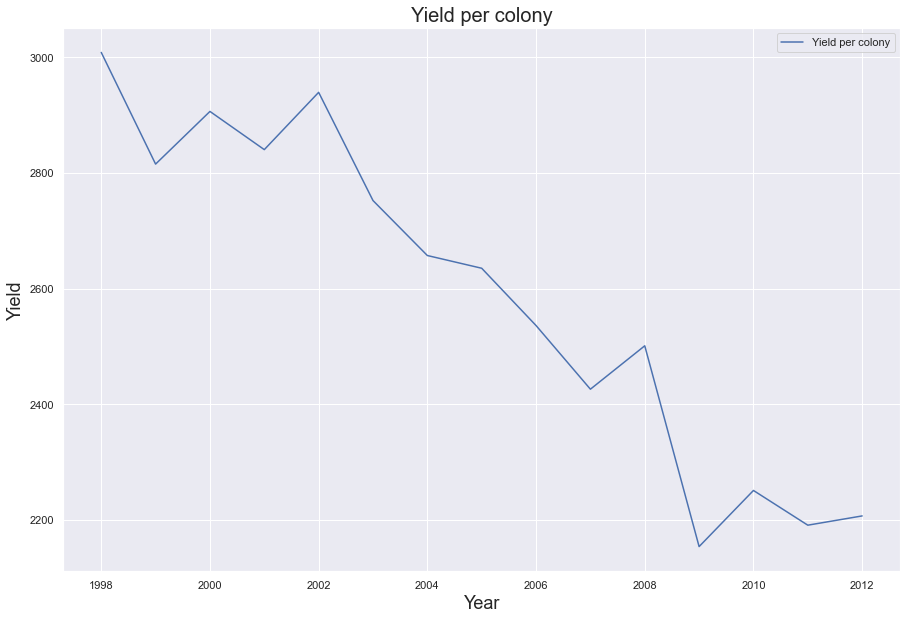

In [11]:
## Plotting grouped data

plt.figure(figsize=(15,10))
sns.lineplot(x=yield_.index,y=yield_.values,label='Yield per colony')
plt.title("Yield per colony", size=20)
plt.xlabel("Year", size=18)
plt.ylabel("Yield", size = 18)

## Over time, which states produce the most honey? Which produce the least? 

In [12]:
state = df['totalprod'].groupby(by=df['state'], axis=0, sort=False).sum().sort_values(ascending=False)
state.head()

state
ND    475085000.0
CA    347535000.0
SD    266141000.0
FL    247048000.0
MT    156562000.0
Name: totalprod, dtype: float64

Text(0, 0.5, 'Produced')

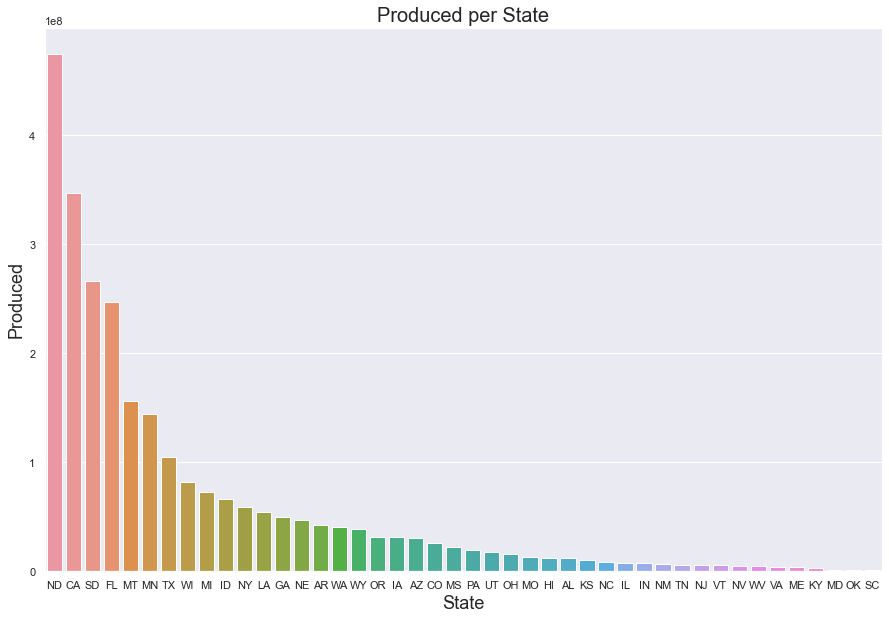

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x=state.index,y=state.values) ## Barplot is useful, when we have categories, such as state
plt.title("Produced per State", size=20)
plt.xlabel("State", size=18)
plt.ylabel("Produced", size = 18)

In [14]:
state1998 = df['totalprod'].groupby(by=df['state'].loc[df['year']==1998], axis=0).sum()
state_1998 = pd.DataFrame({'State_1998':state1998.index,'Total_Produced_1998':state1998.values})
## Grouping the data and creating a dataframe with it!
state_1998.tail(10)

,State_1998,Total_Produced_1998
33,SD,21375000.0
34,TN,448000.0
35,TX,7007000.0
36,UT,1740000.0
37,VA,296000.0
38,VT,384000.0
39,WA,2958000.0
40,WI,8099000.0
41,WV,330000.0
42,WY,2760000.0


In [15]:
state2012 = df['totalprod'].groupby(by=df['state'].loc[df['year']==2012], axis=0).sum() 
state_2012 = pd.DataFrame({'State_2012':state2012.index,'Total_Produced_2012':state2012.values})
## Grouping the data and creating a dataframe with it!
state_2012.tail(10)

,State_2012,Total_Produced_2012
30,SD,16380000.0
31,TN,366000.0
32,TX,4784000.0
33,UT,950000.0
34,VA,164000.0
35,VT,240000.0
36,WA,2542000.0
37,WI,4140000.0
38,WV,288000.0
39,WY,2550000.0


 - We see that there are missing states in 2012 dataset, maybed they stopped producing honey. We'll try to add them and sort by state again. We'll add these states with a value of 0.

In [16]:
## Checking states in each dataset
print(state_1998['State_1998'].unique())
print(state_2012['State_2012'].unique())

['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY'
 'LA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NV'
 'NY' 'OH' 'OK' 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV'
 'WY']
['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY'
 'LA' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NY' 'OH'
 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


- We are missing MD, NV, and OK

In [17]:
## Adding the missing states to the 2012 dataset

missing = pd.DataFrame({'State_2012':['MD','NV', 'OK'], 'Total_Produced_2012':[0,0,0]})
state_2012 = state_2012.append(missing, ignore_index=True)
state_2012.tail(10)

,State_2012,Total_Produced_2012
33,UT,950000.0
34,VA,164000.0
35,VT,240000.0
36,WA,2542000.0
37,WI,4140000.0
38,WV,288000.0
39,WY,2550000.0
40,MD,0.0
41,NV,0.0
42,OK,0.0


## Which have experienced the most change in honey yield?

In [18]:
states = list(state_1998['State_1998']) ## We will iterate over the list of states
absolute_difference = [] ## Creating a list to add the absolute difference for 
most_change = 0 ## We'll need to initialize a variable with the most change, if we don't
                ## initialize, there will be no initial variable to compare in the if.
most_change_index = 0 

for i in states:
    index_x = state_1998['Total_Produced_1998'].loc[state_1998['State_1998']==i].index
    index_y = state_2012['Total_Produced_2012'].loc[state_2012['State_2012']==i].index
    
    ## Since the states are not aligned, for example, WY in index 39 in 1998 and index 42 in 2012, we'll first 
    ## extract the index the state, then we'll extract this value below, we'll then calculate the differences.
    
    value_1998 = float(state_1998['Total_Produced_1998'][index_x])
    value_2012 = float(state_2012['Total_Produced_2012'][index_y])
    difference = value_2012 - value_1998  ## If the farm produced more honey in 2012, than in 1998, this will be positive
    absolute_difference.append(difference)
   
    ## Now that we're calculating the absolutes, we'll create an if to update the most change in honey yield
    
    if abs(difference) > abs(most_change):
        most_change =  difference  ## Every time the absolute difference is bigger than the current absolute most_change,
                                   ## the current value of the most_change will be updates, easy to perform! 
                                   ## remember that we need to use absolute in both cases, as the values of most change, 
                                   ## may negative as well, after an update
        most_change_index = index_y
        
print("The state with most honey production change is", state_1998['State_1998'][most_change_index].values,
      "with a decrease of", most_change,"production")

The state with most honey production change is ['CA'] with a decrease of -25800000.0 production


## Does the data show any trends in terms of the number of honey producing colonies and yield per colony before 2006, which was when concern over Colony Collapse Disorder spread nationwide?

- For this, we'll need to plot from 1998 to 2006. That's easy, we group the data for all years before 2007

In [19]:
yield_2006 = df['yieldpercol'].loc[df['year']<2007].groupby(by=df['year']).sum() 
yield_2006.head()

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

Text(0, 0.5, 'Yield')

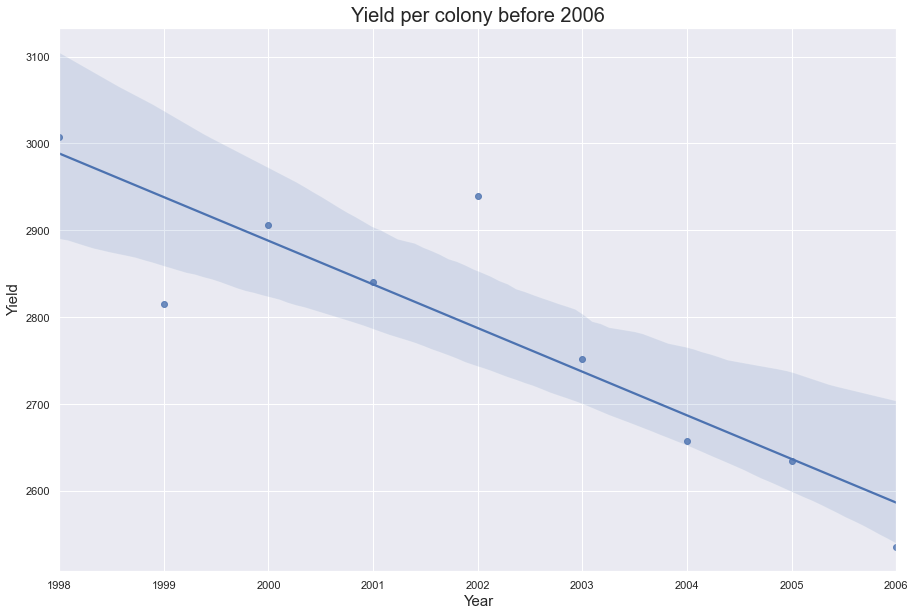

In [20]:
plt.figure(figsize=(15,10))
sns.regplot(x=yield_2006.index,y=yield_2006.values)
plt.title("Yield per colony before 2006", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Yield", size = 15)

- There's a strong tendency of decrease, this can be seen by plotting the data point and fitting a linear regression in it with seaborn regplot.

## Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

Text(0, 0.5, 'Price')

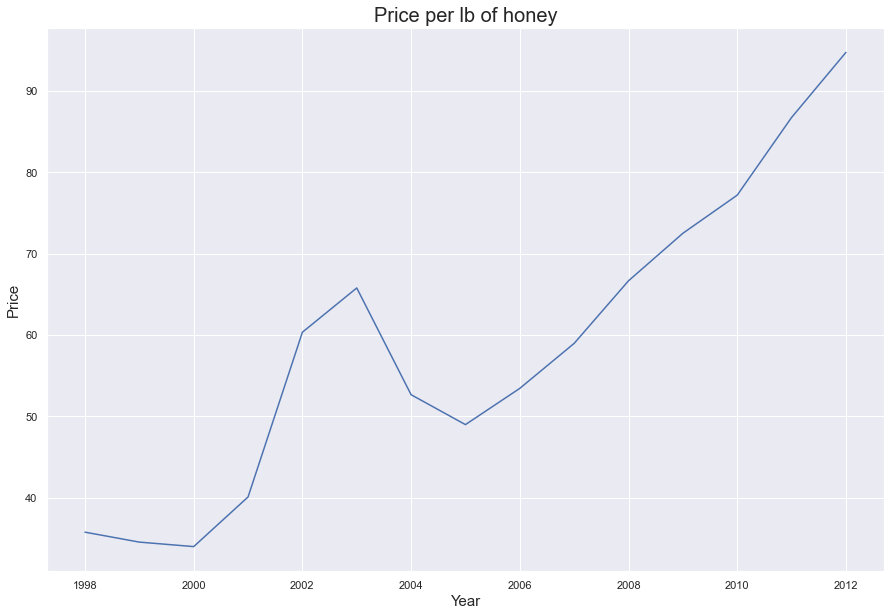

In [21]:
plt.figure(figsize=(15,10))
plt.plot(df['priceperlb'].groupby(by=df['year']).sum())
plt.title("Price per lb of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)

We saw that the production is decreasing year by year, if the demand is the same, the price will go up. This can be seen in the above graphic

Text(0, 0.5, 'Price')

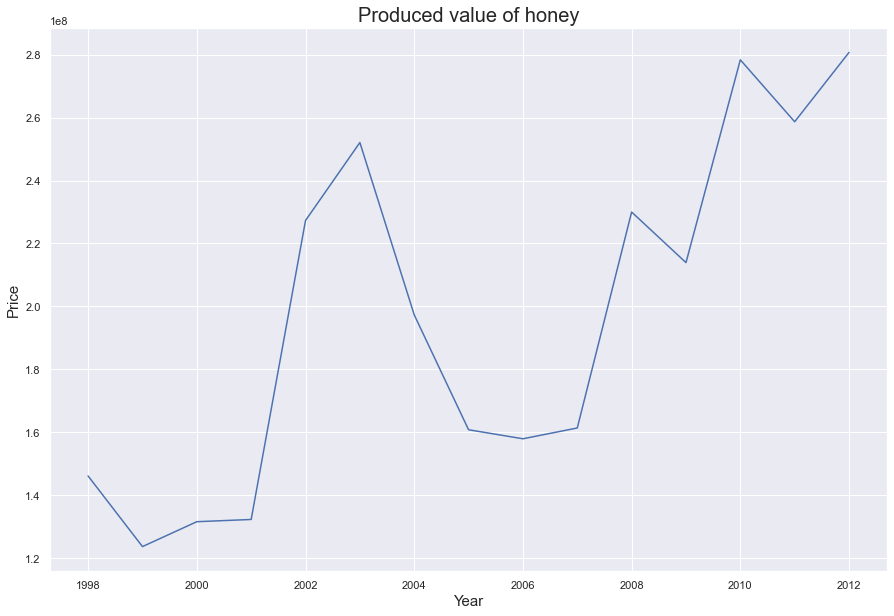

In [22]:
plt.figure(figsize=(15,10))
plt.plot(df['prodvalue'].groupby(by=df['year']).sum())
plt.title("Produced value of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)

- We see that the produced value is tied with the Yield per colony and the price per lb. When there's a decrease in Yield, but a increse in price, the price will adjust. For example, let's look into the years 2001-2003 and 2003-2005.

- From 2001-2003, there was a huge increase in value. We didn't see a significant decrease in Yield, but the price skyrocket!

- From 2003-2005, the price decrease (not to the same level of 2001), as well as the yield, so the produced value decrease a lot.

-  During the next years, we see a continous decrease of yield and a continuous increase in price per lb, but the tendency of the produced value is to always increase.